#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 8 de julho. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_08jul2020.xlsx'
df = pd.read_excel(filename)

In [3]:
df.shape

(568708, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568708 entries, 0 to 568707
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  568708 non-null  object        
 1   estado                  568573 non-null  object        
 2   municipio               562744 non-null  object        
 3   coduf                   568708 non-null  int64         
 4   codmun                  564928 non-null  float64       
 5   codRegiaoSaude          562744 non-null  float64       
 6   nomeRegiaoSaude         562744 non-null  object        
 7   data                    568708 non-null  datetime64[ns]
 8   semanaEpi               568708 non-null  int64         
 9   populacaoTCU2019        566524 non-null  object        
 10  casosAcumulado          568708 non-null  int64         
 11  casosNovos              568708 non-null  int64         
 12  obitosAcumulado         568708

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
491105,Sul,RS,Erval Seco,43,430730.0,43015.0,REGIAO 15,2020-06-20,25,6912,0,0,0,0,NaN,NaN,0.0
502944,Sul,RS,Nova Prata,43,431330.0,43025.0,REGIAO 25,2020-06-03,23,27257,19,2,0,0,NaN,NaN,0.0
118304,Nordeste,RN,Espírito Santo,24,240350.0,24001.0,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,2020-04-16,16,10505,0,0,0,0,NaN,NaN,0.0
295744,Sudeste,MG,Pescador,31,315000.0,31096.0,ITAMBACURI,2020-05-02,18,4252,0,0,0,0,NaN,NaN,0.0
195555,Nordeste,BA,Aramari,29,290220.0,29001.0,ALAGOINHAS,2020-07-08,28,11397,10,1,0,0,NaN,NaN,0.0
94300,Nordeste,PI,Uruçuí,22,221120.0,22007.0,TABULEIROS DO ALTO PARNAIBA,2020-05-06,19,21558,9,2,0,0,NaN,NaN,0.0
341134,Sudeste,RJ,Trajano de Moraes,33,330590.0,33009.0,SERRANA,2020-06-17,25,10626,30,0,0,0,NaN,NaN,0.0
482675,Sul,RS,Cacique Doble,43,430320.0,43018.0,REGIAO 18,2020-06-14,25,5065,2,0,0,0,NaN,NaN,0.0
176495,Nordeste,AL,Coqueiro Seco,27,270220.0,27001.0,1ª REGIAO DE SAUDE,2020-06-10,24,5845,77,8,2,0,NaN,NaN,1.0
154659,Nordeste,PB,Zabelê,25,251740.0,25005.0,5ª REGIAO,2020-06-14,25,2240,0,0,0,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    16788
RJ    10970
CE     6665
PE     5323
PA     5169
AM     2967
MA     2324
BA     2277
ES     1911
MG     1355
RN     1326
AL     1213
PB     1171
PR      895
MT      882
SE      875
PI      858
RS      825
DF      801
GO      733
RO      585
AP      462
SC      432
AC      404
RR      386
TO      233
MS      134
Name: obitosAcumulado, dtype: int64

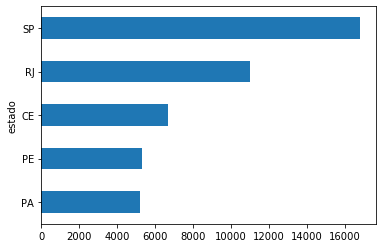

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

In [8]:
df['data'] = df['data'].dt.strftime('%d/%m')

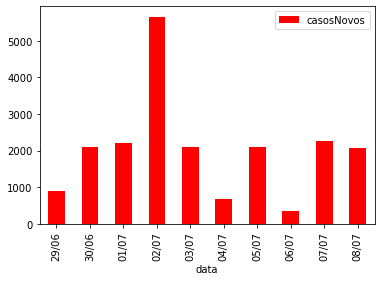

In [9]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

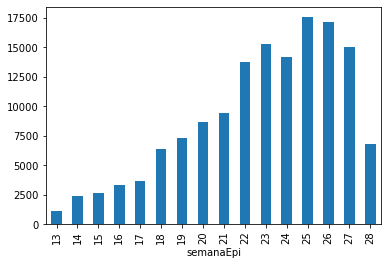

In [10]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

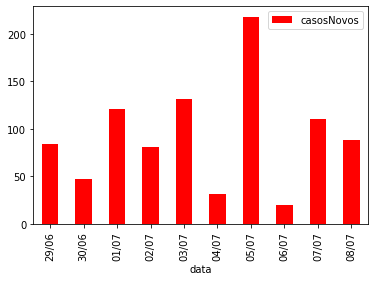

In [11]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

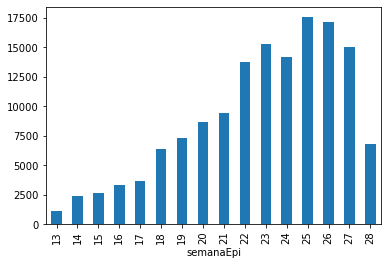

In [12]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')